# Getting Started

### Install datastack via pip

Note, that after installation via pip, it might be necessary to restart the kernel to make the datastack package availabe.


In [ ]:
!pip install datastack

### MNIST Example

MNIST is the pre-implemented dataset that can be seen as a blueprint for custom dataset implementations. 

In [5]:
from data_stack.mnist.factory import MNISTFactory
from data_stack.io.storage_connectors import FileStorageConnector


In [12]:
# create file storage connector to store and retrieve the dataset
dataset_path = "./datasets/"   # specify dataset path
storage_connector = FileStorageConnector(root_path=dataset_path)

We instantiate the MNIST factory by passing the `storage_connector`. If the dataset has been already downloaded it is being only loaded from the local disc.
In this example here, the MNIST dataset is not present locally and is thus being donwloaded (see log outputs).


In [13]:
mnist_factory = MNISTFactory(storage_connector)
mnist_iterator, _ = mnist_factory.get_dataset_iterator(config={"split": "train"})

2022-01-30 00:52:58,519 - DataHub - DEBUG - Created temporary directory /tmp/tmpololuio4 for downloading resources...
2022-01-30 00:52:58,519 - DataHub - DEBUG - Downloading data file from http://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz ...


9913344it [00:01, 5962118.85it/s]                             
2022-01-30 00:53:03,267 - DataHub - DEBUG - Done.
2022-01-30 00:53:03,290 - DataHub - DEBUG - Downloading data file from http://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz ...


29696it [00:00, 1124672.01it/s]          
2022-01-30 00:53:04,227 - DataHub - DEBUG - Done.
2022-01-30 00:53:04,228 - DataHub - DEBUG - Downloading data file from https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz ...


1649664it [00:00, 1928038.52it/s]                           
2022-01-30 00:53:06,457 - DataHub - DEBUG - Done.
2022-01-30 00:53:06,464 - DataHub - DEBUG - Downloading data file from https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz ...


5120it [00:00, 3398454.89it/s]          
2022-01-30 00:53:07,853 - DataHub - DEBUG - Done.
2022-01-30 00:53:07,854 - DataHub - DEBUG - Storing resource mnist/raw/samples_train.gz
2022-01-30 00:53:07,887 - DataHub - DEBUG - Storing resource mnist/raw/labels_train.gz
2022-01-30 00:53:07,889 - DataHub - DEBUG - Storing resource mnist/raw/samples_test.gz
2022-01-30 00:53:07,896 - DataHub - DEBUG - Storing resource mnist/raw/targets.gz
2022-01-30 00:53:11,049 - DataHub - DEBUG - Storing resource mnist/preprocessed/train/samples.pt
2022-01-30 00:53:11,524 - DataHub - DEBUG - Storing resource mnist/preprocessed/train/targets.pt
2022-01-30 00:53:12,014 - DataHub - DEBUG - Storing resource mnist/preprocessed/test/samples.pt
2022-01-30 00:53:12,179 - DataHub - DEBUG - Storing resource mnist/preprocessed/test/targets.pt


The raw and preprocessed datasets are stored within the folder `mnist` under `datasets`, as specified above.

In [17]:
ls datasets/mnist/preprocessed/train

samples.pt  targets.pt


Now, we can directly index elements or easily iterate through the dataset.

Sample has target 5 and tag 5 and has a shape of torch.Size([28, 28])


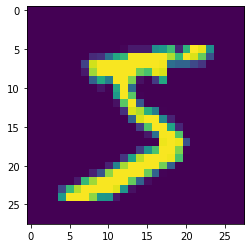

In [19]:
img, target, tag = mnist_iterator[0]
print(f"Sample has target {target} and tag {tag} and has a shape of {img.shape}")

# visualize the sample
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

In [23]:
from collections import Counter

targets = [t for _, t, _ in mnist_iterator]
Counter(targets)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})